In [11]:
import pandas as pd
import numpy as np



In [60]:
df = pd.read_csv('train.csv')
articles = df['Text']

for i, text in enumerate(articles[:5]):
    print("article:{}\t{}".format(i+1, text))
    print()

article:1	lifestyle governs mobile choice faster better funkier hardware alone going help phone firms sell handsets research suggests instead phone firms keen get customers pushing technology sake consumers far interested handsets fit lifestyle screen size onboard memory chip inside shows depth study handset maker ericsson historically industry much focus using technology said dr michael bjorn senior advisor mobile media ericsson consumer enterprise lab stop saying technologies change lives said try speak consumers language help see fits told bbc news website study ericsson interviewed 14 000 mobile phone owners ways use phone people habits remain said dr bjorn move activity mobile phone much convenient way one good example diary writing among younger people said diaries always popular mobile phone especially one equipped camera helps keep different form youngsters use text messages also reflects desire chat keep contact friends lets slightly changed way dr bjorn said although consumer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

def calculate_word_frequency(documents):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    word_freq = dict(zip(vectorizer.get_feature_names(), X.sum(axis=0).tolist()[0]))
    return word_freq

In [13]:
from IPython.display import display

# Identify Unique words
vectorizer = CountVectorizer()
vectorized_and_frequencies = vectorizer.fit_transform(articles)

term_freq_matrix = vectorized_and_frequencies.toarray()

# Get the vocabulary
vocabulary = vectorizer.get_feature_names_out ()

word_freq_dict = {word: freq for word, freq in zip(vocabulary, term_freq_matrix.sum(axis=0))}

sorted_terms = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)

top_50_terms = sorted_terms[:50]
top_50_df = pd.DataFrame(top_50_terms, columns=['term', 'frequency'])
display(top_50_df.head(50))
print(f'vector vocabulary - {vectorizer.vocabulary_}\n')



,term,frequency
0,said,1357
1,people,612
2,new,500
3,also,479
4,one,479
5,film,462
6,year,442
7,music,413
8,us,411
9,mr,408


vector vocabulary - {'lifestyle': 7222, 'governs': 5566, 'mobile': 7939, 'choice': 2494, 'faster': 4785, 'better': 1620, 'funkier': 5262, 'hardware': 5798, 'alone': 851, 'going': 5526, 'help': 5898, 'phone': 9010, 'firms': 4961, 'sell': 10811, 'handsets': 5771, 'research': 10186, 'suggests': 11791, 'instead': 6485, 'keen': 6877, 'get': 5432, 'customers': 3339, 'pushing': 9665, 'technology': 12090, 'sake': 10573, 'consumers': 3017, 'far': 4769, 'interested': 6528, 'fit': 4969, 'screen': 10721, 'size': 11124, 'onboard': 8515, 'memory': 7751, 'chip': 2491, 'inside': 6460, 'shows': 11024, 'depth': 3615, 'study': 11710, 'handset': 5770, 'maker': 7497, 'ericsson': 4459, 'historically': 5973, 'industry': 6387, 'much': 8075, 'focus': 5047, 'using': 12845, 'said': 10567, 'dr': 4006, 'michael': 7816, 'bjorn': 1684, 'senior': 10831, 'advisor': 701, 'media': 7714, 'consumer': 3016, 'enterprise': 4405, 'lab': 6993, 'stop': 11613, 'saying': 10637, 'technologies': 12089, 'change': 2406, 'lives': 7307

In [14]:
vector = vectorizer.transform(articles)
print(f'features\n {vectorizer.get_feature_names_out()}\n')
# summarize encoded vector
print(f'vector shape: {vector.shape}\n')
number_of_features = vector.shape[1]

print(f'number of features: {number_of_features}\n')
article_df = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())
article_df['Category'] = df['Category']
article_df.head()

features
 ['00' '000' '000th' ... 'zooms' 'zooropa' 'zorro']

vector shape: (428, 13518)

number of features: 13518



,00,000,000th,001st,0051,007,0100,0130,028,05,...,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro,Category
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tech
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,entertainment
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,entertainment
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,entertainment
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,entertainment


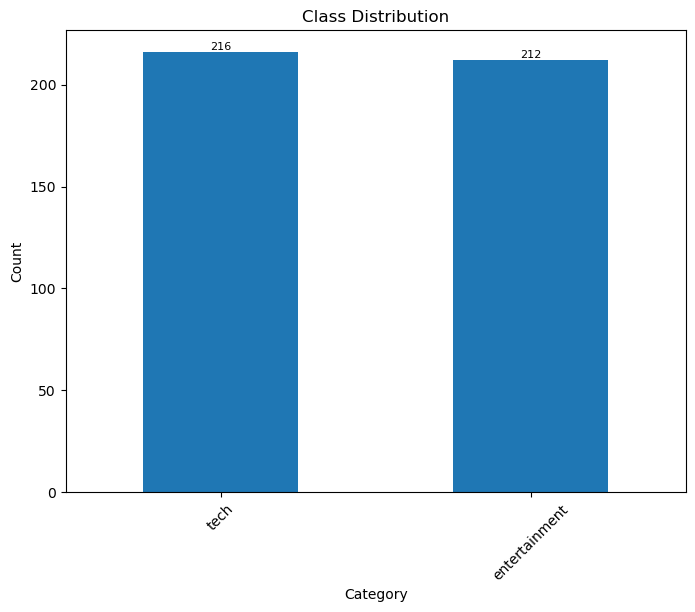

In [57]:
import matplotlib.pyplot as plt

class_distribution = df['Category'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))  # Set the figure size
bars = class_distribution.plot(kind='bar')  # Plot the bar graph
plt.xlabel('Category')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Class Distribution')  # Set the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

for i, v in enumerate(class_distribution):
    bars.text(i, v, str(v), ha='center', va='bottom', fontsize=8)
plt.show()

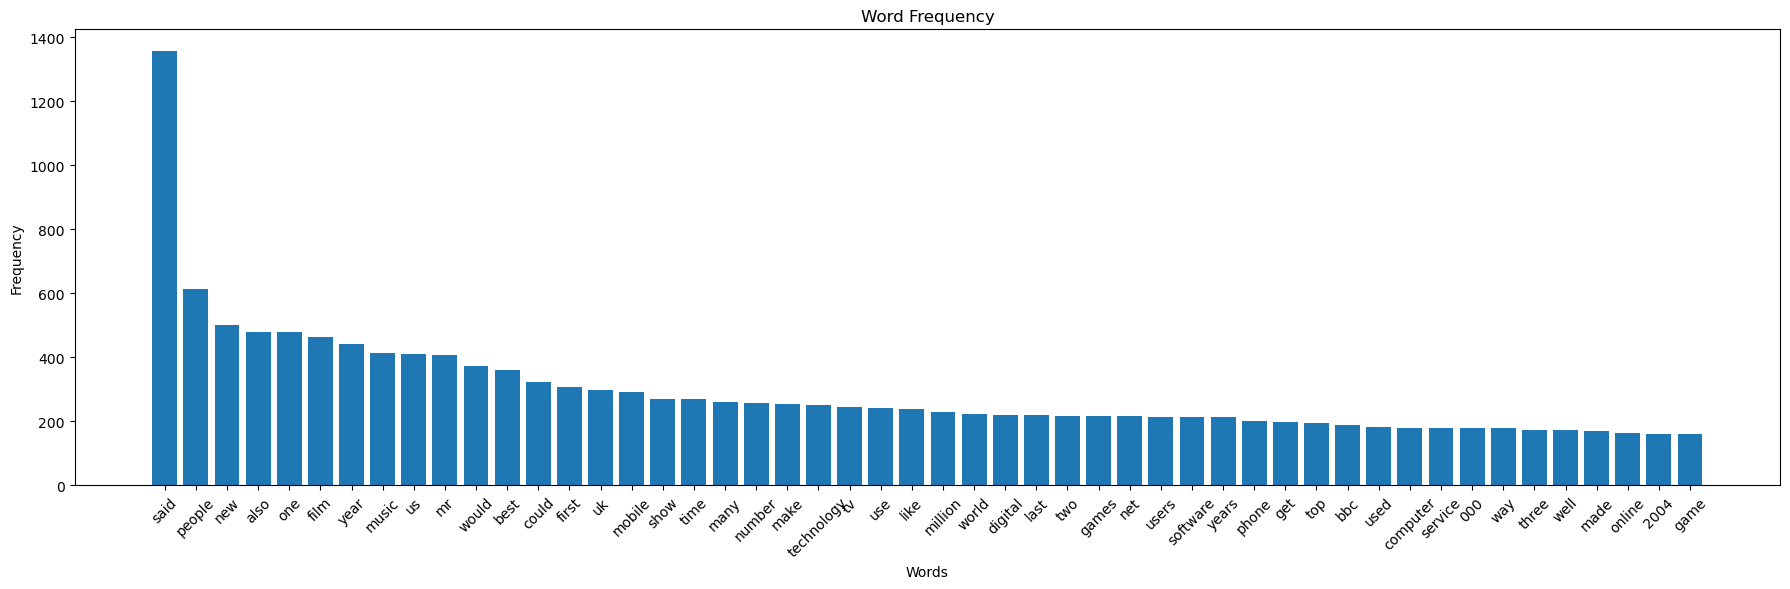

In [15]:
words = [word for word, freq in sorted_terms]
frequencies = [freq for word, freq in sorted_terms]

plt.figure(figsize=(18, 6))  # Increase the figure width to stretch the x-axis
plt.bar(words[:50], frequencies[:50])

plt.xlabel('Words')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Word Frequency')  # Set the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust spacing between the bars
plt.show()

c:\Users\rukun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


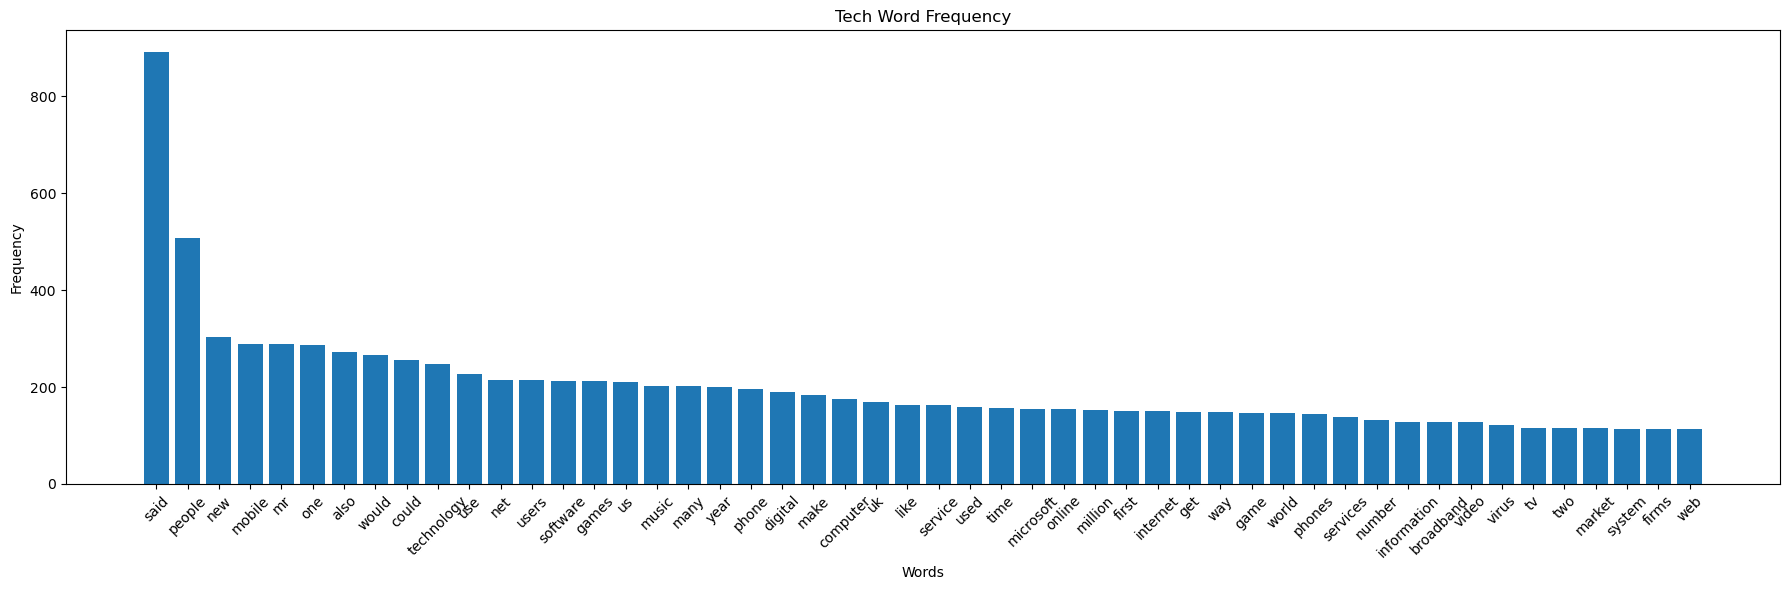

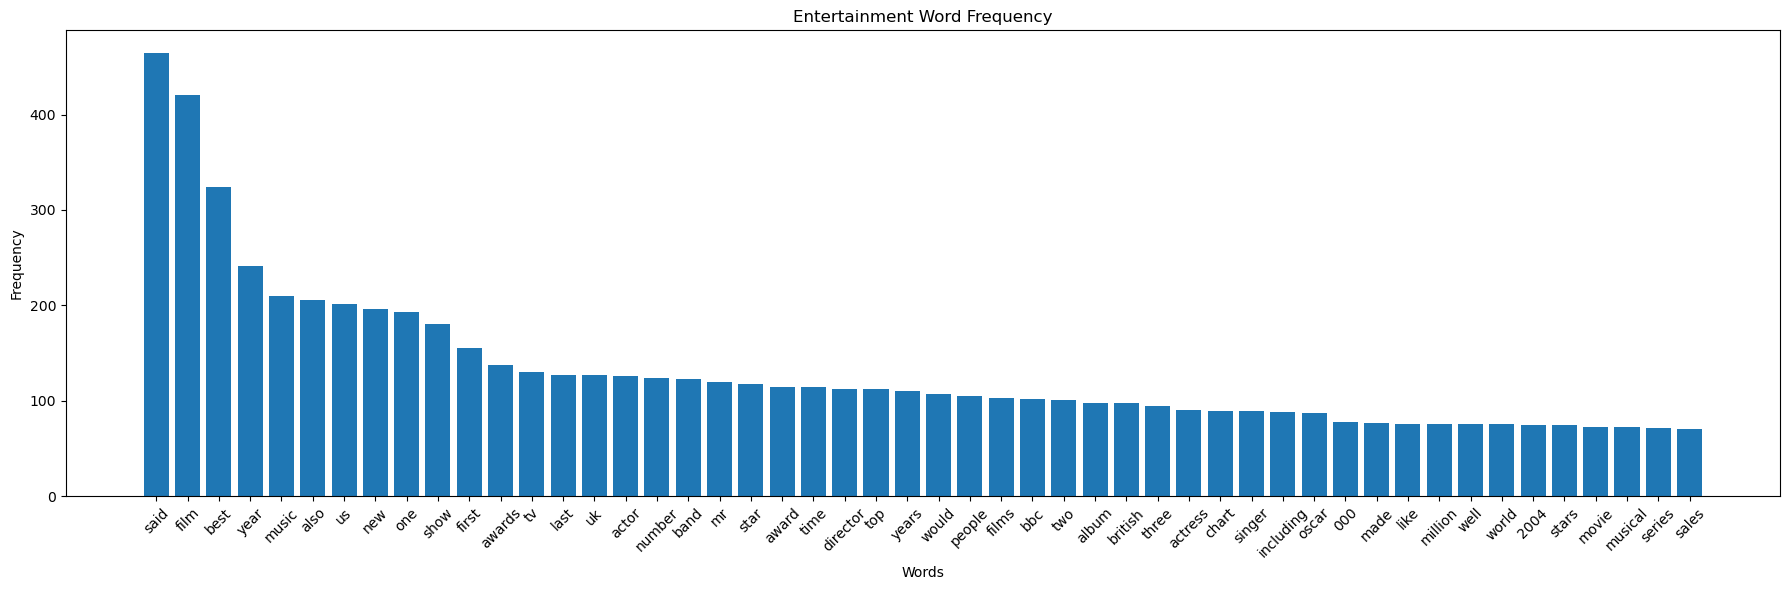

In [59]:
tech_df = df[df['Category'] == 'tech']['Text']
entertainment_df = df[df['Category'] == 'entertainment']['Text']


tech_frequency = calculate_word_frequency(tech_df)
entertainment_frequency = calculate_word_frequency(entertainment_df)

# print(tech_frequency)
sorted_terms_tech_frequency  = sorted(tech_frequency.items(), key=lambda x: x[1], reverse=True)
sorted_terms_entertainment_frequency = sorted(entertainment_frequency.items(), key=lambda x: x[1], reverse=True)

tech_words= [word for word, freq in sorted_terms_tech_frequency]
tech_frequencies = [freq for word, freq in sorted_terms_tech_frequency]

entertainment_words= [word for word, freq in sorted_terms_entertainment_frequency]
entertainment_frequencies = [freq for word, freq in sorted_terms_entertainment_frequency]

plt.figure(figsize=(18, 6))  
plt.bar(tech_words[:50], tech_frequencies[:50])

plt.xlabel('Words')  
plt.ylabel('Frequency') 
plt.title('Tech Word Frequency')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


plt.figure(figsize=(18, 6))  # Increase the figure width to stretch the x-axis
plt.bar(entertainment_words[:50], entertainment_frequencies[:50])

plt.xlabel('Words')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Entertainment Word Frequency')  # Set the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust spacing between the bars
plt.show()



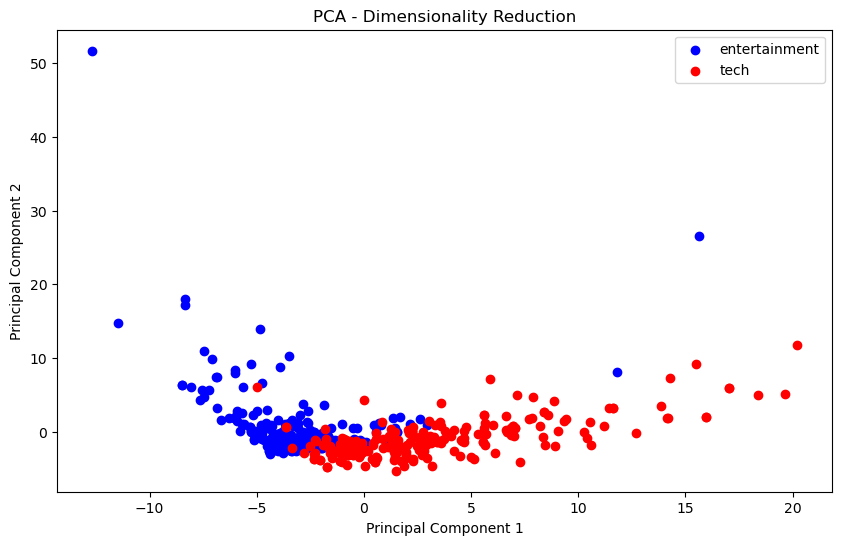

In [16]:
from sklearn.decomposition import PCA


# X = np.array(article_df)
# y = np.array(df['Category'])
X = article_df.iloc[:, :-1].values
y = article_df.iloc[:, -1].values



pca = PCA(n_components=2)  # Number of components to keep (2 in this case)
X_reduced = pca.fit_transform(X)
df_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_reduced['category'] = y


plt.figure(figsize=(10, 6))
categories = np.unique(y)
colors = ['blue', 'red']

for category, color in zip(categories, colors):
    indices = df_reduced['category'] == category
    plt.scatter(df_reduced.loc[indices, 'PC1'], df_reduced.loc[indices, 'PC2'], c=color, label=category)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA - Dimensionality Reduction')
plt.show()

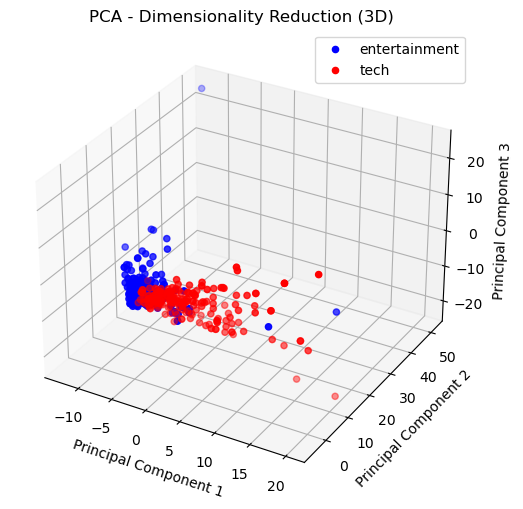

In [17]:
# from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Number of components to keep (3 in this case)
X_reduced = pca.fit_transform(X)
df_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df_reduced['category'] = y

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
categories = np.unique(y)
colors = ['blue', 'red']

for category, color in zip(categories, colors):
    indices = df_reduced['category'] == category
    ax.scatter(df_reduced.loc[indices, 'PC1'], df_reduced.loc[indices, 'PC2'], df_reduced.loc[indices, 'PC3'], c=color, label=category)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
ax.set_title('PCA - Dimensionality Reduction (3D)')
plt.show()
